In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("FAOFP1990_2022.csv", delimiter=" ")
df.head()

,Date,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
1,01/01/1990,64.1,73.4,53.5,64.1,44.59,87.9
2,01/02/1990,64.5,76.0,52.2,62.2,44.50,90.7
3,01/03/1990,63.8,77.8,41.4,61.3,45.75,95.1
4,01/04/1990,65.8,80.4,48.4,62.8,44.02,94.3
5,01/05/1990,64.4,81.0,39.2,62.0,45.50,90.4


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              390 non-null    object 
 1   Food.Price.Index  390 non-null    float64
 2   Meat              390 non-null    float64
 3   Dairy             390 non-null    float64
 4   Cereals           390 non-null    float64
 5   Oils              390 non-null    float64
 6   Sugar             390 non-null    float64
dtypes: float64(6), object(1)
memory usage: 24.4+ KB


In [12]:
df.describe()

,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,84.974359,83.771026,83.600000,86.184615,88.221897,80.760513
std,25.680581,16.833919,32.682621,31.002685,37.704093,31.144603
min,50.500000,51.100000,36.800000,48.600000,35.830000,31.800000
25%,63.725000,70.625000,55.050000,60.025000,62.262500,57.950000
50%,78.450000,82.100000,76.200000,84.200000,80.415000,74.900000
75%,99.000000,97.075000,109.150000,101.750000,105.752500,99.000000
max,159.700000,125.900000,156.500000,173.500000,251.800000,183.200000


Change Dtype in data column

In [14]:
df["Date"] = df["Date"].astype("datetime64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              390 non-null    datetime64[ns]
 1   Food.Price.Index  390 non-null    float64       
 2   Meat              390 non-null    float64       
 3   Dairy             390 non-null    float64       
 4   Cereals           390 non-null    float64       
 5   Oils              390 non-null    float64       
 6   Sugar             390 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 24.4 KB


In [15]:
df.head()

,Date,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
1,1990-01-01,64.1,73.4,53.5,64.1,44.59,87.9
2,1990-01-02,64.5,76.0,52.2,62.2,44.50,90.7
3,1990-01-03,63.8,77.8,41.4,61.3,45.75,95.1
4,1990-01-04,65.8,80.4,48.4,62.8,44.02,94.3
5,1990-01-05,64.4,81.0,39.2,62.0,45.50,90.4


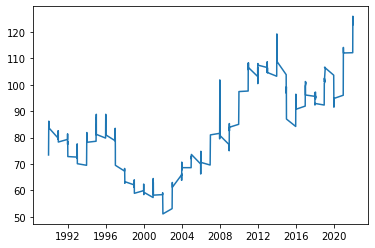

In [35]:
x = df["Date"]
y = df["Meat"]

plt.plot(x,y)


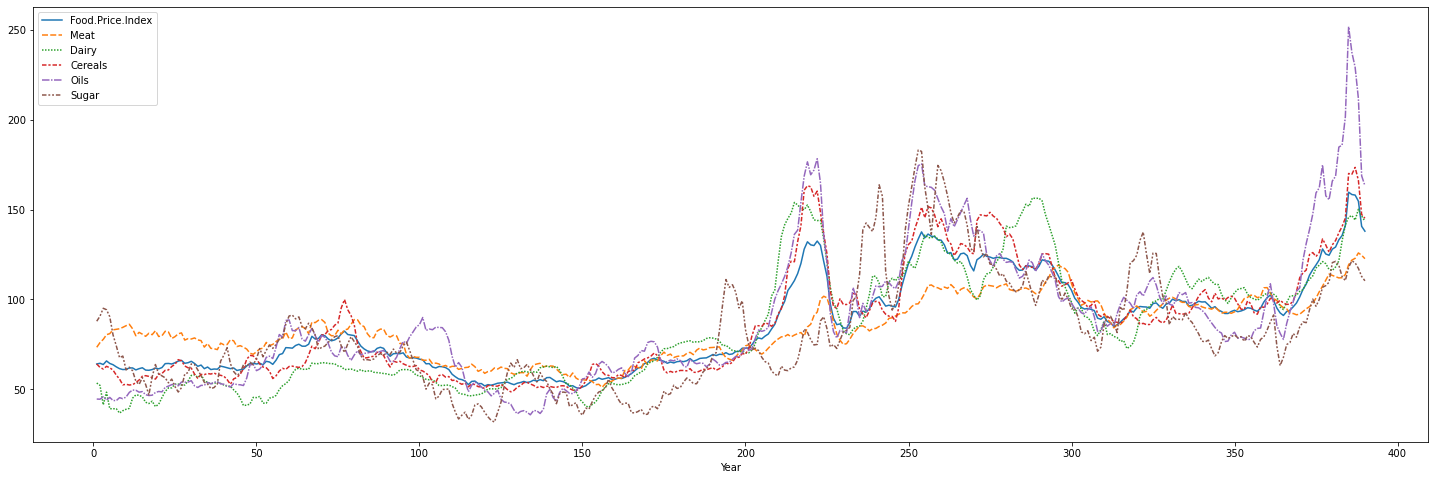

In [52]:
#df_test = df.rolling(8).mean()

plt.figure(figsize=(25,8))
sns.lineplot(data=df, palette="tab10")
plt.xlabel("Year")
plt.show();